In [ ]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, freqz, resample

In [ ]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, freqz, resample
data = pd.read_csv('datafile.csv')
#data = data.set_index('time')
data['time'] = data.time/10000000

In [ ]:
data_read = data.query('time > 0.75')
data_read1 = data_read.query('time < 1.25')

In [ ]:
data_read1 = data_read1.set_index('time')

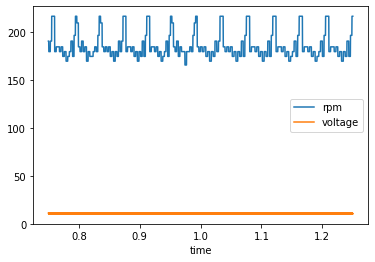

In [ ]:
data_read1.plot()

In [ ]:
u_rpm = data_read1.rpm
u_voltage = data_read1.voltage

In [ ]:
t = np.linspace(0,1,1000)

In [ ]:
re_rpm = resample(u_rpm,1000,t)

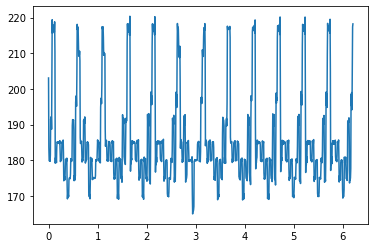

In [ ]:
plt.plot(re_rpm[1],re_rpm[0])

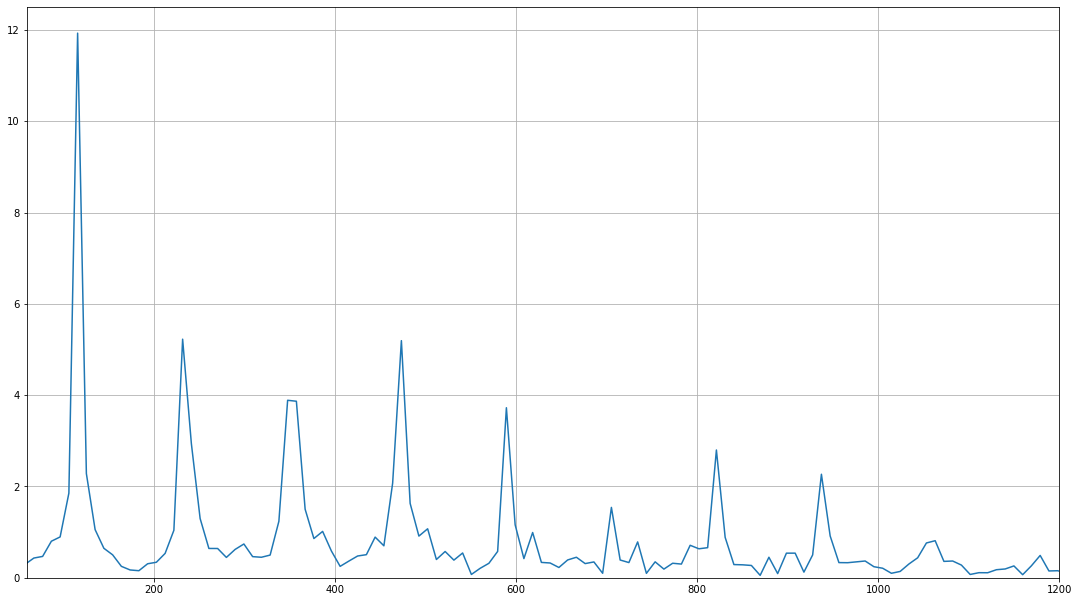

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Number of sample points
N = len(re_rpm[0])
# sample spacing
T = max(re_rpm[1]) / N
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(re_rpm[0])
xf = fftfreq(N, T)[:N//2]
xf = 60 *xf
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([1*60, 20*60])
plt.ylim([0,12.50])
plt.grid()
plt.show()

In [ ]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [ ]:
# Filter requirements.
order = 1
fs = 1000       # sample rate, Hz
cutoff = 200/60  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

fil_rpm = butter_lowpass_filter(re_rpm[0],cutoff,fs,order)

In [ ]:
b

array([0.01036382, 0.01036382])

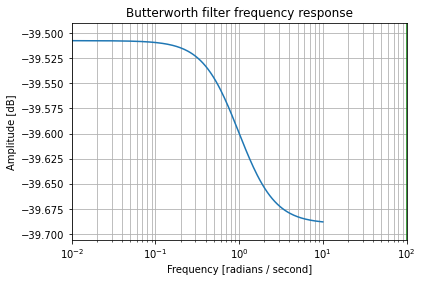

In [ ]:
w, h = sig.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

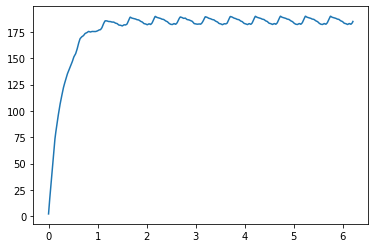

In [ ]:
plt.plot(re_rpm[1],fil_rpm)

In [ ]:
plt.plot(abs(X))

array([1.15311100e+06  -0.j        , 6.75039566e+02+188.37486992j,
       5.14398416e+02 +49.22294035j, ..., 9.48781178e+02+199.34112484j,
       5.14398416e+02 -49.22294035j, 6.75039566e+02-188.37486992j])

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
n_data = normalize(data)

<AxesSubplot:xlabel='time'>

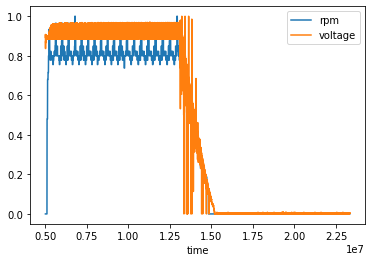

In [ ]:
n_data.plot()

C:\Users\DEEPEN~1\AppData\Local\Temp/ipykernel_4940/3547388747.py:16: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


(-0.1, 25.0)

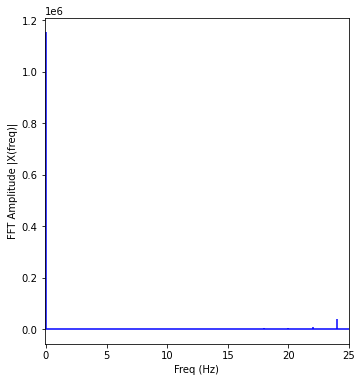

In [ ]:
#fft analysis of the signal and plotting the frequency response graphs
from scipy.fft import fft, fftfreq

N = len(data_read1)
sr = N/(1.25-0.75)

X = fft(np.array(data_read1.rpm))

n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(-0.1, 25)

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
filtered_vo = lowess(endog = np.array(n_data.voltage),exog = np.array(n_data.index), frac=0.05)
filtered_rpm = lowess(endog = np.array(n_data.rpm),exog = np.array(n_data.index), frac=0.05)

In [ ]:
data_vo = np.transpose(filtered_vo)
data_rpm = np.transpose(filtered_rpm)

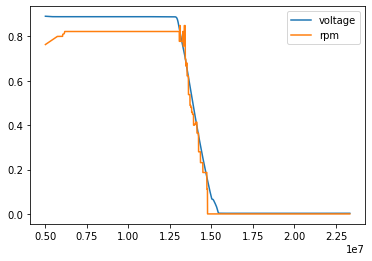

In [ ]:
plt.plot(data_vo[0],data_vo[1], label = "voltage")
plt.plot(data_rpm[0],data_rpm[1], label = "rpm")
plt.legend()

In [ ]:
1/SAMPLE_RATE

12702.857142857141

In [ ]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [ ]:
# Filter requirements.
order = 1
fs = 2000.0       # sample rate, Hz
cutoff = 12  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)


fil_volt = butter_lowpass_filter(np.array(n_data.voltage),cutoff,fs,order)

In [ ]:
# Filter requirements.
order = 1
fs = 2000.0       # sample rate, Hz
cutoff = 500  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

fil_rpm = butter_lowpass_filter(np.array(n_data.rpm),cutoff,fs,order)

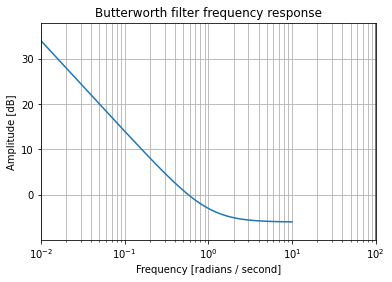

In [ ]:
w, h = sig.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

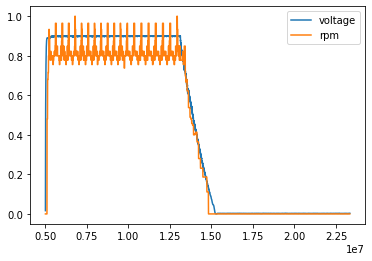

In [ ]:
plt.plot(data.index,fil_volt,label='voltage')
plt.plot(data.index,fil_rpm,label ='rpm')
plt.legend()

In [ ]:
import numpy as np
from scipy import signal as sig
from scipy import optimize as opt


class TF_identificator:
    def __init__(self):
        self.tf = None
        self.inputs = None

    def first_order_mdl(self, t, k, pole):
        self.tf = sig.TransferFunction(k, [pole, 1])
        to, yo, xo = sig.lsim2(self.tf, U=self.inputs, T=t)
        return yo

    def second_order_mdl(self, t, k, wn, delta):
        self.tf = sig.TransferFunction(k*(wn**2), [1, 2*delta*wn, wn**2])
        to, yo, xo = sig.lsim2(self.tf, U=self.inputs, T=t)
        return yo

    def identify_first_order(self, t, u, orig_output, method='lm', p0=[1.0, 1.0]):
        self.inputs = u
        params, params_cov = opt.curve_fit(self.first_order_mdl, t, orig_output,
                                           method=method, maxfev=1000, p0=p0)
        return {'k': params[0], 'tau': params[1]}

    def identify_second_order(self, t, u, orig_output, method='lm', p0=[1.0, 1.0, 0.1]):
        self.inputs = u
        params, params_cov = opt.curve_fit(self.second_order_mdl, t, orig_output,
                                           method=method, maxfev=1000, p0=p0)
        return {'k': params[0], 'wn': params[1], 'zeta': params[2]}

In [ ]:
t_list = data_vo[0]
u_list = data_vo[1]
y_list = data_rpm[1]

In [ ]:
tf_ident = TF_identificator()
params =  tf_ident.identify_second_order(t_list, u_list, y_list,                                                      
                                         p0=[200, 0.05, 0.8])
print("Obtained params:")
print(params)

Obtained params:
{'k': 0.9229542512658173, 'wn': 0.0501320102999584, 'zeta': 0.7992376165300475}


In [ ]:
params = {'k': 0.9229542512658173, 'wn': 0.0501320102999584, 'zeta': 0.7992376165300475}
k = params['k']
wn = params['wn']
delta = params['zeta']

In [ ]:
tf_identify = sig.TransferFunction(k*(wn**2), [1, 2*delta*wn, wn**2])

In [ ]:
tout, yout, xout = sig.lsim(tf_identify,np.array(data.voltage),np.array(data.index))

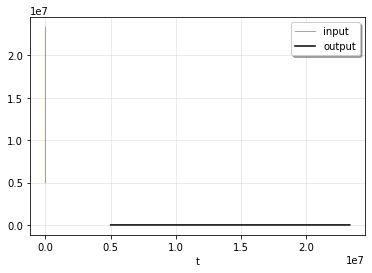

In [ ]:
plt.plot(np.array(data.voltage),np.array(data.index), 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

In [ ]:
tf_identify

TransferFunctionContinuous(
array([0.00231959]),
array([1.        , 0.08013478, 0.00251322]),
dt: None
)

In [ ]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, freqz, resample
data = pd.read_csv('datafile.csv')
#data = data.set_index('time')
data['time'] = data.time/10000000

In [ ]:
pip install geneticalgorithm control

     |████████████████████████████████| 357 kB 5.0 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=5676f0276aa58f1e26bfee20e02784171bb8d48cf8d9f58f2a0bd808157214c3
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


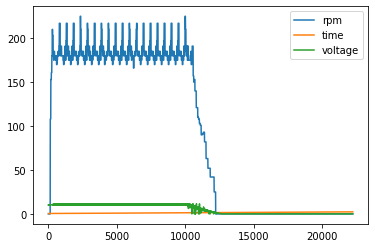

In [ ]:
data.plot()
t = data.time
rpm = data.rpm
voltage = data.voltage

In [ ]:
t = np.linspace(min(t),max(t),len(t))
re_rpm = resample(rpm,len(rpm),t)[0]
re_voltage = resample(voltage,len(voltage),t)[0]

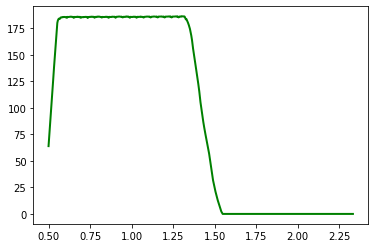

In [ ]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#plt.plot(t, rpm,'o')
#plt.plot(t, smooth(rpm,3), 'r-', lw=2)
plt.plot(t, smooth(re_rpm,1000), 'g-', lw=2)

In [ ]:
rpm_s = smooth(re_rpm,1000)
voltage_s = smooth(re_voltage,1000)

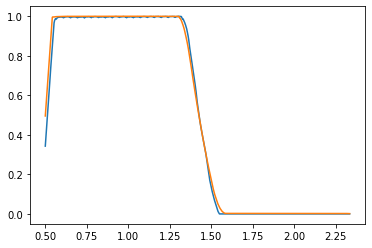

In [ ]:
plt.plot(t,rpm_s/max(rpm_s))
plt.plot(t,voltage_s/max(voltage_s))

In [ ]:
import control
from control import TransferFunction
from control.matlab import lsim
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

 The best solution found:
 [1.77175393e+01 6.07022205e-03]

 Objective function:
 14.554214709037081


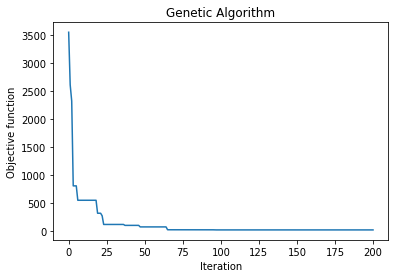

In [ ]:
input_values = voltage_s
output_values = rpm_s
time = t
s = TransferFunction.s
def Loss_function(x):
  system_model = x[0]/(1 + x[1]*s)
  rpm_hat,t,x_out = lsim(system_model, U=input_values, T=time, X0=0.0)
  return mean_squared_error(rpm_s,rpm_hat)

algorithm_param = {'max_num_iteration': 200,\
                   'population_size':50,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[0,30],[0,1]])

model=ga(function=Loss_function,dimension=2,variable_type='real',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

In [ ]:
x =  [1.77175393e+01 ,6.07022205e-03]
system_model = x[0]/(1 + x[1]*s)
rpm_hat,t,x_out = lsim(system_model, U=input_values, T=time, X0=0.0)

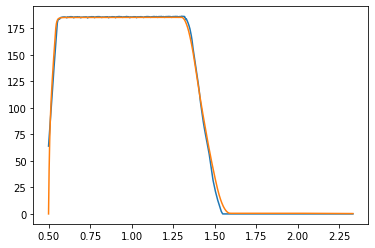

In [ ]:
plt.plot(t,rpm_s)
plt.plot(t,rpm_hat)

In [ ]:
motor_v_w = 
driver_cs_v=
sensor_theta_meas_theta_out=
w_to_T = 
body_T_theta_out = 
error = theta_ref - theta_mes
cs = PID(error)